In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import date

import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook


Bad key "text.kerning_factor" on line 4 in
C:\Users\franc\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# 1.- Analisis preliminar de los datos

In [2]:
dataset = pd.read_csv('baseSCL2017.csv', index_col = 0,infer_datetime_format=True)
dataset.head(5)

C:\Users\franc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


Al leer los datos, notamos que inmediatamente se nos advierte que hay columnas que presentan más de un tipo de datos. En concreto las columnas **Ori-I** y **Ori-O** presentan más de un tipo de dato y deben ser objeto de mayor inspeccion.

Si miramos el tipo de datos para todas las columnas, notamos que python considera que, en general, estas dos columnas son de tipo *object*

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68206 entries, 0 to 70032
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.9+ MB


In [4]:
print('Observaciones en el dataset:', dataset.shape[0])
print('Numero de columnas en el dataset:', dataset.shape[1])

Observaciones en el dataset: 68206
Numero de columnas en el dataset: 18


Usando la información anterior, notamos que solo existe una observacion con un valor *Null* en el campo **Vlo-O**. Esta vuelo se ve de la siguiente forma:

In [5]:
dataset[dataset.isnull().any(axis=1)]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6148,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


Revisamos la cantidad de valores diferentes que presenta cada una de las columnas de nuestro dataset

In [6]:
dataset.nunique()

Fecha-I      53252
Vlo-I          750
Ori-I            1
Des-I           64
Emp-I           30
Fecha-O      62774
Vlo-O          866
Ori-O            1
Des-O           63
Emp-O           32
DIA             31
MES             12
AÑO              2
DIANOM           7
TIPOVUELO        2
OPERA           23
SIGLAORI         1
SIGLADES        62
dtype: int64

Observamos que existen tres columnas con valores fijos, las cuales son, según la descripción de los campos:
    
    1. Ori-I: Código de ciudad de origen programado.
    2. Ori-O: Codigo de ciudad de origen de operación.
    3. SIGLAORI: Nombre ciudad origen.
  
por lo que, a pesar de que en la descripción del problema se nos menciona que hay datos sobre vuelos que aterrizan en SCL, solo contamos con vuelos que tienen origen en SCL y no como destino (esto hay que chequearlo de todas maneras). Además esto nos permite poder prescindir de estas columnas. Notemos que dos de estas columnas eran las que presentaban problemas con el tipo de dato (probablemente por problemas de transcripción), pero como no trabajaremos con estas, no es necesario tratarlas.

Otro hecho que nos parece curioso es que el campo **Vlo-I**, dada su descripción (*Número de vuelo programado*) no este compuesto solo por valores únicos. A pesar de que esto se podia apreciar en el head del dataset, sigue pareciendonos curioso. Conjeturamos que la combinacion **Fecha**, **Vlo-I** o en conjunto con la ciudad destino deben ser un pares/Tripletas únicas.

In [7]:
#Check de sanidad respecto a que ningun vuelo tiene como destigo SCL. El resultado deberia ser un df vacio
dataset[dataset['Des-I'] == 'SCEL']

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES


In [8]:
#Si la combinacion es única, debe darnos un df de (68206,1)
print(dataset[['Fecha-I','Vlo-I','Ori-I']].groupby(['Fecha-I','Vlo-I']).count().shape)

print(dataset[['Fecha-I','Vlo-I','Des-I','Ori-I']].groupby(['Fecha-I','Vlo-I','Des-I']).count().shape)

(68189, 1)
(68205, 1)


In [9]:
dataset[['Fecha-I','Vlo-I','Des-I','Ori-I']].groupby(['Fecha-I','Vlo-I','Des-I']).count().max()

Ori-I    2
dtype: int64

Observamos que la tripleta **'Fecha-I','Vlo-I','Des-O'** es casi una manera para identificar de manera única a los vuelos, salvo dos observaciones que coinciden en dichos valores. Veremos si existen observaciones duplicadas

In [10]:
#En caso de no haber datos duplicados, el resultado es un df vacio
dataset[dataset.duplicated()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES


In [11]:
dataset[['Fecha-I','Vlo-I','Des-I','Emp-I','Ori-I']].groupby(['Fecha-I','Vlo-I','Des-I','Emp-I']).count().max()

Ori-I    2
dtype: int64

In [12]:
dataset[['Fecha-I','Vlo-I','Des-I','Fecha-O','Ori-I']].groupby(['Fecha-I','Vlo-I','Des-I','Fecha-O']).count().max()

Ori-I    1
dtype: int64

El dataset no presenta datos duplicados, aún así presenta datos que concuerda tanto en la fecha, id de vuelo ciudad de destino y empresa operaria, lo cual nos parece un poco sospechoso (puede ser debido a una falla humana), pues solo difieren en la hora de arribo.

In [13]:
#Aqui va como se ven dichas observaciones
paso = dataset[['Fecha-I','Vlo-I','Des-I','Ori-I']].groupby(['Fecha-I','Vlo-I','Des-I']).count().reset_index()
paso = paso[paso['Ori-I'] == 2]

dataset[(dataset['Fecha-I'] == paso['Fecha-I'].iloc[0]) & (dataset['Des-I'] == paso['Des-I'].iloc[0])]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
13010,2017-03-26 08:55:00,1,SCEL,SCTE,SKU,2017-03-26 10:00:00,1,SCEL,SCTE,SKU,26,3,2017,Domingo,N,Sky Airline,Santiago,Puerto Montt
14205,2017-03-26 08:55:00,1,SCEL,SCTE,SKU,2017-03-26 09:02:00,1,SCEL,SCTE,SKU,26,3,2017,Domingo,N,Sky Airline,Santiago,Puerto Montt


Otra cosa que nos parece curiosa, dado el diccionario de los datos, diferencias entre la cantidad de registros diferentes entre los siguientes campos:
      
      1. Des-I con Des-O
      2. Emp-I con Emp-O
      3. Vlo-I con Vlo-O
      
Por lo que revisaremos la cantida de casos en que se producen diferencias entre el destino programado y el real, la aerolinea programada y la real, además del codigo de vuelo programado y real.

Creamos columnas nuevas correspondientes que indiquen si se presentan cambios o no

In [14]:
dataset['Match-Des'] = [0 if des_i == des_o else 1 for des_i,des_o in dataset[['Des-I','Des-O']].values]
dataset[['Match-Des','Ori-I']].groupby('Match-Des').count()

,Ori-I
Match-Des,
0,68178
1,28


In [15]:
dataset[dataset['Match-Des'] == 1].head(2)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Match-Des
1437,2017-01-17 19:20:00,25,SCEL,SCTE,SKU,2017-01-17 19:46:00,25,SCEL,SCQP,SKU,17,1,2017,Martes,N,Sky Airline,Santiago,Temuco,1
7436,2017-02-15 06:25:00,11,SCEL,SCTE,SKU,2017-02-15 06:25:00,11,SCEL,SCQP,SKU,15,2,2017,Miercoles,N,Sky Airline,Santiago,Temuco,1


In [16]:
dataset['Match-Emp'] = [0 if des_i == des_o else 1 for des_i,des_o in dataset[['Emp-I','Emp-O']].values]
dataset[['Match-Emp','Ori-I']].groupby('Match-Emp').count()

,Ori-I
Match-Emp,
0,49537
1,18669


In [17]:
dataset[dataset['Match-Emp'] == 1].head(2)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Match-Des,Match-Emp
356,2017-01-21 22:30:00,2291,SCEL,SABE,AUT,2017-01-21 22:28:00,2291,SCEL,SABE,ARG,21,1,2017,Sabado,I,Austral,Santiago,Buenos Aires,0,1
845,2017-01-01 07:14:00,624,SCEL,SPJC,AVA,2017-01-01 07:11:00,624,SCEL,SPJC,LRC,1,1,2017,Domingo,I,Avianca,Santiago,Lima,0,1


In [18]:
dataset['Match-Vlo'] = [0 if des_i == des_o else 1 for des_i,des_o in dataset[['Vlo-I','Vlo-O']].values]
dataset[['Match-Vlo','Ori-I']].groupby('Match-Vlo').count()

,Ori-I
Match-Vlo,
0,66356
1,1850


In [19]:
dataset[dataset['Match-Vlo'] == 1].head(2)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Match-Des,Match-Emp,Match-Vlo
6094,2017-01-05 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-05 09:36:00,1001,SCEL,SAEZ,LAN,...,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires,0,0,1
6096,2017-01-07 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-07 06:59:00,1001,SCEL,SAEZ,LAN,...,1,2017,Sabado,I,Grupo LATAM,Santiago,Buenos Aires,0,0,1


In [20]:
dataset[['Match-Des','Match-Emp','Match-Vlo','Ori-I']].groupby(['Match-Des','Match-Emp','Match-Vlo']).count().reset_index()

,Match-Des,Match-Emp,Match-Vlo,Ori-I
0,0,0,0,48108
1,0,0,1,1411
2,0,1,0,18227
3,0,1,1,432
4,1,0,0,11
5,1,0,1,7
6,1,1,0,10


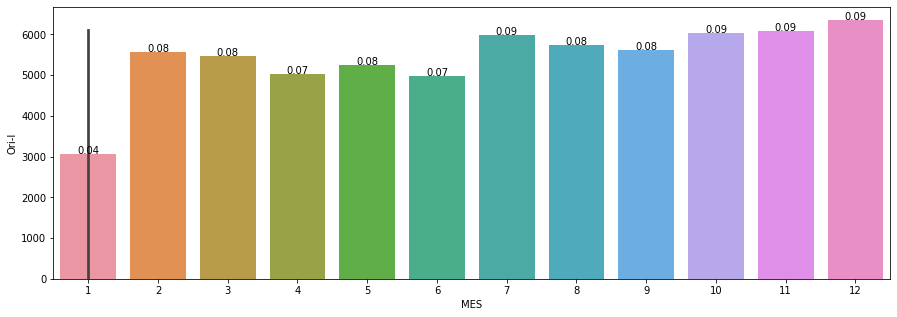

In [21]:
total = float(len(dataset))
plt.figure(figsize=(15,5))

ax = sns.barplot(x = 'MES', y = 'Ori-I', data = dataset[['AÑO','MES','Ori-I']].groupby(['MES','AÑO']).count().reset_index())

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

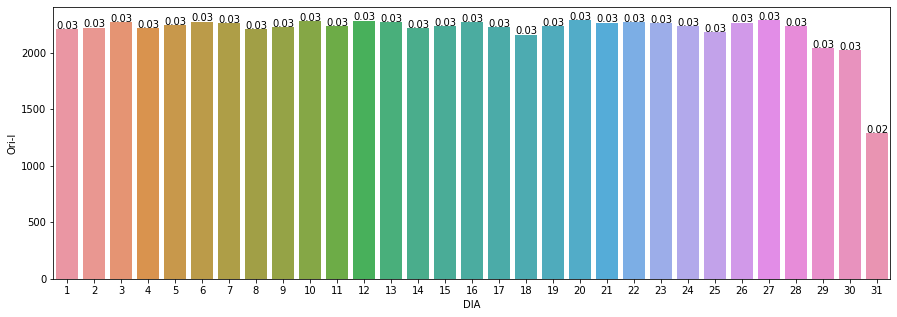

In [22]:
plt.figure(figsize=(15,5))

ax = sns.barplot(x = 'DIA', y = 'Ori-I', data = dataset[['DIA','Ori-I']].groupby(['DIA']).count().reset_index())

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

De los dos graficos anteriores concluimos que no hay, a simple vista, diferencias significaticas en cuanto a la cantidad de vuelos que se producen por mes/dia.

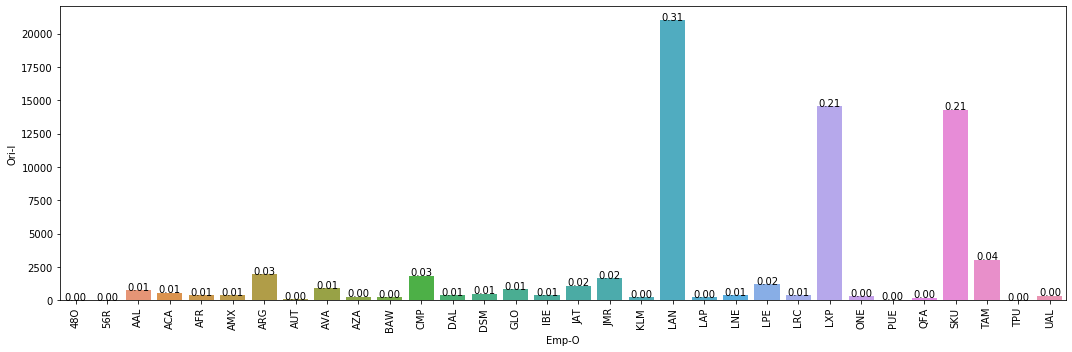

In [23]:
plt.figure(figsize=(15,5))

ax = sns.barplot(x = 'Emp-O', y = 'Ori-I', data = dataset[['Emp-O','Ori-I']].groupby(['Emp-O']).count().reset_index() )
plt.xticks(rotation=90)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

Las aerolineas que concentran la mayoria de los vuelos son LAN, LXP y SKY

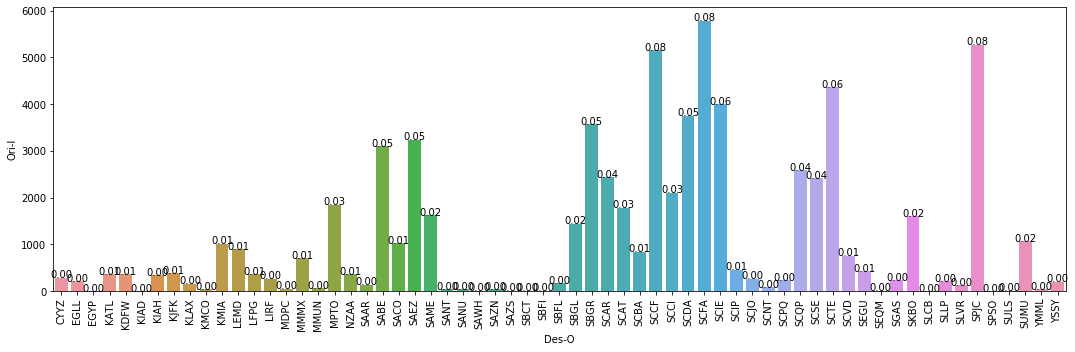

In [24]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x = 'Des-O', y = 'Ori-I',data = dataset[['Des-O','Ori-I']].groupby(['Des-O']).count().reset_index() )
plt.xticks(rotation=90)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

Hay destinos que acumulan muy poca cantidad de vuelos y unos destinos que son absolutamente más populares que el resto.

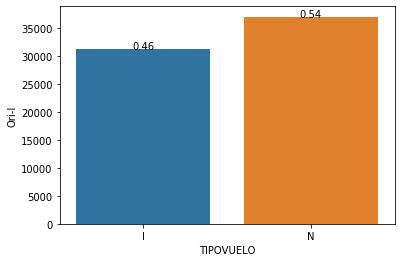

In [25]:
ax = sns.barplot(x = 'TIPOVUELO', y = 'Ori-I', data = dataset[['TIPOVUELO','Ori-I']].groupby(['TIPOVUELO']).count().reset_index())
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

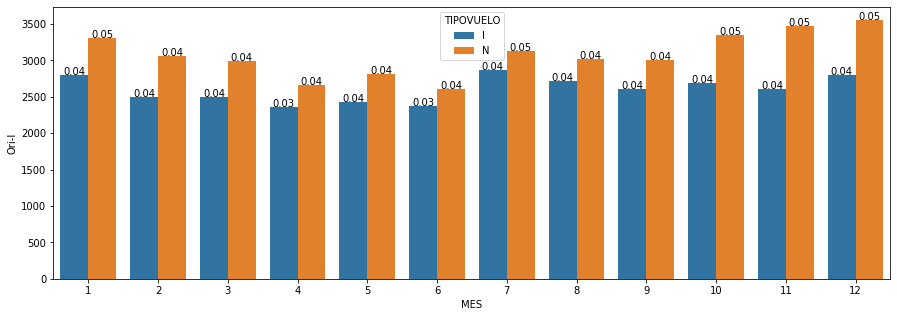

In [26]:
plt.figure(figsize=(15,5))

ax = sns.barplot(x = 'MES', y = 'Ori-I',hue = 'TIPOVUELO', data = dataset[['MES','TIPOVUELO','Ori-I']].groupby(['MES','TIPOVUELO']).count().reset_index())
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

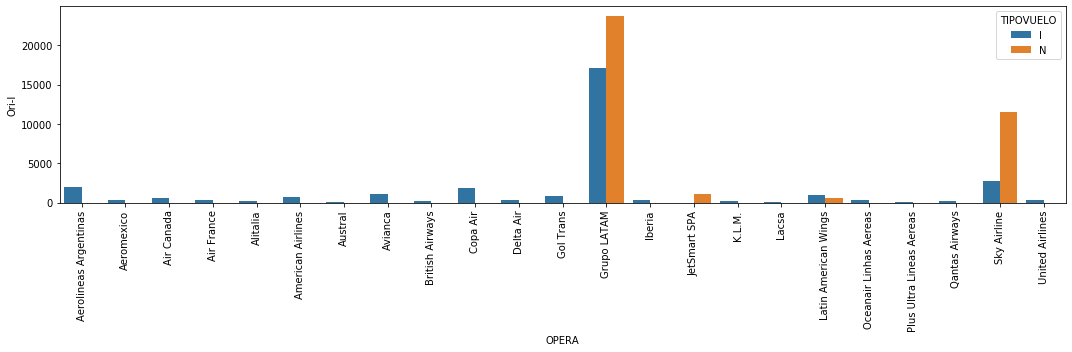

In [27]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x = 'OPERA',  y= 'Ori-I',hue = 'TIPOVUELO', data = dataset[['OPERA','TIPOVUELO','Ori-I']].groupby(['OPERA','TIPOVUELO']).count().reset_index())
plt.xticks(rotation=90)
plt.tight_layout()

La mayoria de los vuelos son nacionales, en donde la cantidad de vuelos totales operados a nivel mensual aumenta a medida que pesan los meses, además solo cuatro aerolineas operan dichos vuelos

# 2.- Creacion de nuevas columnas

A continuacion, crearemos las 4 variables nuevas descritas en el desafio:
    
    1.- Periodo_dia: Indica si el vuelo fue en la mañana,tarde o noche.
    2.- Flag_temporada_alta: Indica si el vuelo se efectuo en temporada alta (1) o no (0).
    3.- Dif_min: Diferencia (en minutos) de la hora de despeje programada con la hora efectiva.
    4.- Atraso15: Indica si la diferencia es mayor a 15 minutos.
    
Además crearemos una columna llamada *Es_FDS* la cual indica si el vuelo fue en fin de semana (Viernes, Sabado, Domingo) o no. 

Por limitantes de tiempo y de conocimiento suficiente, no fue posible agregar variables atmosfericas, las cuales afectan fuertemente en los atrasos de los vuelos. Se testearon 2 wraper de API's, pero una de ellas solo permitia 50 consultas diarias y la segunda solo mirar 5 dias hacia atras desde la fecha actual, de todas formas se adjunta el codigo (funcional) en un archivo **.py** externo.

Comenzamos transformando a formato *datetime* las columnas **Fecha-I** y **Fecha-O** para poder manipularlas de forma correcta:

In [28]:
dataset['Fecha-I'] = pd.to_datetime(dataset['Fecha-I'])
dataset['Fecha-O'] = pd.to_datetime(dataset['Fecha-O'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68206 entries, 0 to 70032
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

In [29]:
dataset['Periodo_dia'] = [('mañana' if tiempo.hour < 12 else ('tarde' if tiempo.hour < 17 else 'noche')) for tiempo in dataset['Fecha-I'].dt.time]
print(dataset[['Fecha-I','Periodo_dia']])

                  Fecha-I Periodo_dia
0     2017-01-01 23:30:00       noche
1     2017-01-02 23:30:00       noche
2     2017-01-03 23:30:00       noche
3     2017-01-04 23:30:00       noche
4     2017-01-05 23:30:00       noche
...                   ...         ...
70028 2017-12-22 14:55:00       tarde
70029 2017-12-25 14:55:00       tarde
70030 2017-12-27 14:55:00       tarde
70031 2017-12-29 14:55:00       tarde
70032 2017-12-31 14:55:00       tarde

[68206 rows x 2 columns]


In [30]:
def temp_alta(x):
    fecha = x.date()
    if((fecha >= date(2017, 12, 15) or fecha <= date(2017,3,3)) or (fecha >= date(2017, 7, 15) and fecha <= date(2017,7,31)) or (fecha >= date(2017, 9, 11) and fecha <= date(2017,9,30))):
        return 1
    else:
        return 0

dataset['Flag_temporada_alta'] = dataset['Fecha-I'].apply(temp_alta)
print(dataset[['Fecha-I','Flag_temporada_alta']])

                  Fecha-I  Flag_temporada_alta
0     2017-01-01 23:30:00                    1
1     2017-01-02 23:30:00                    1
2     2017-01-03 23:30:00                    1
3     2017-01-04 23:30:00                    1
4     2017-01-05 23:30:00                    1
...                   ...                  ...
70028 2017-12-22 14:55:00                    1
70029 2017-12-25 14:55:00                    1
70030 2017-12-27 14:55:00                    1
70031 2017-12-29 14:55:00                    1
70032 2017-12-31 14:55:00                    1

[68206 rows x 2 columns]


In [31]:
dataset['Dif_min'] = 1440*((dataset['Fecha-O'] - dataset['Fecha-I'])/np.timedelta64(1,'D'))
print(dataset['Dif_min'])

0         3.0
1         9.0
2         9.0
3         3.0
4        -2.0
         ... 
70028    46.0
70029    16.0
70030    40.0
70031    13.0
70032     9.0
Name: Dif_min, Length: 68206, dtype: float64


In [32]:
dataset['Atraso15'] = [1 if minutos > 15 else 0 for minutos in dataset['Dif_min']]
print(dataset[['Dif_min', 'Atraso15']])

       Dif_min  Atraso15
0          3.0         0
1          9.0         0
2          9.0         0
3          3.0         0
4         -2.0         0
...        ...       ...
70028     46.0         1
70029     16.0         1
70030     40.0         1
70031     13.0         0
70032      9.0         0

[68206 rows x 2 columns]


In [33]:
dataset['Es_FDS'] = [1 if (dia == 'Viernes' or dia == 'Sabado' or dia == 'Domingo') else 0 for dia in dataset['DIANOM']]
dataset[['DIANOM','Es_FDS']]

,DIANOM,Es_FDS
0,Domingo,1
1,Lunes,0
2,Martes,0
3,Miercoles,0
4,Jueves,0
...,...,...
70028,Viernes,1
70029,Lunes,0
70030,Miercoles,0
70031,Viernes,1


# 3.- Composicion de la tasa de atraso con respecto a otras variables

Comenzamos viendo la distribucion de las clases:

   Atraso15  Ori-I
0         0  55592
1         1  12614


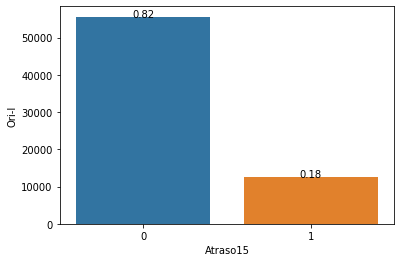

In [34]:
print(dataset[['Atraso15','Ori-I']].groupby(['Atraso15']).count().reset_index())
ax = sns.barplot(x = 'Atraso15', y = 'Ori-I', data = dataset[['Atraso15','Ori-I']].groupby(['Atraso15']).count().reset_index())

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

Observamos que las clases estan altamente desbalancedas, por lo que es un punto que debemos considerar a la hora de trabajr con el modelo.

A continuacion, procedemos a graficar las tasas de atraso mayores a 15 minutos respecto a las variables que consideraremos en el modelo, las cuales son:
    
    1.- Des-I: Destino programado de un vuelo.
    2.- Emp-I: Aerolinea programada de un vuelo.
    3.- DIANOM/Es_FDS: Dia de la semana o indicador si es fin de semana.
    4.- TIPOVUELO: Si el vuelo es nacional o internacional.
    5.- Flag_temporada_alta: Si el vuelo se realizó en temporada alta o no.
    6.- Match-Des: Si existen cambios entre el destino programado y efectivo.
    7.- Match-Emp: Si existen cambios entre el la aerolinea programada y efectiva.
    
 Las variables **Match-Des** y **Match-Emp** captan los cambios en los destinos y aerolineas, por lo cuales reemplazan a las variables **Des-I** y **Emp-I**.

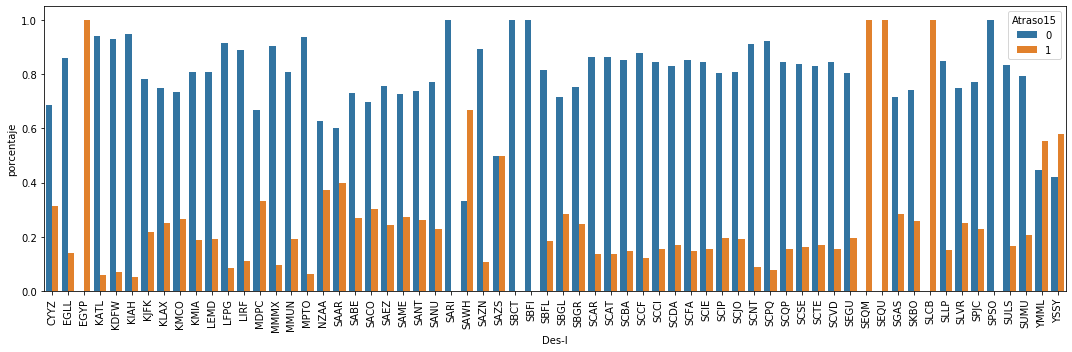

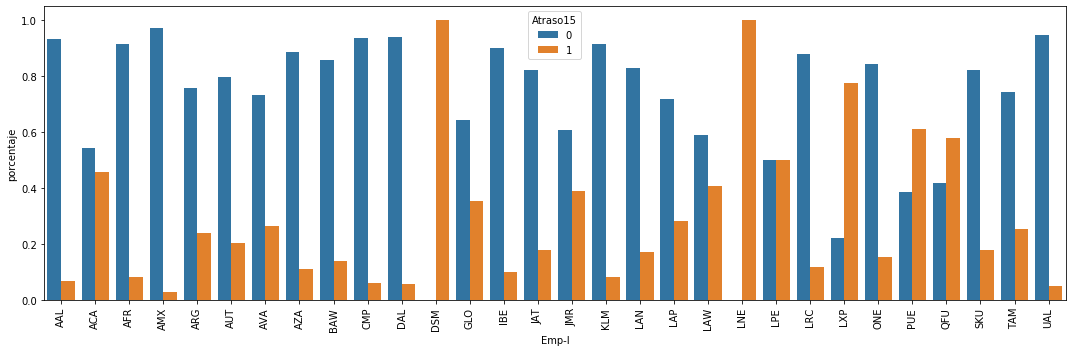

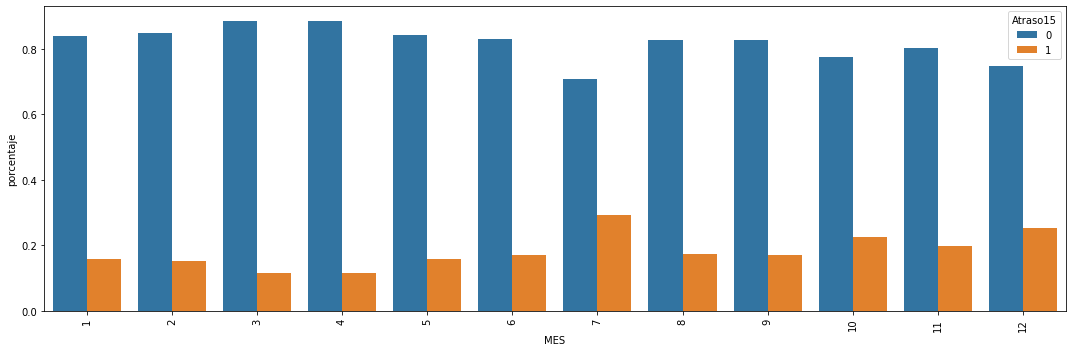

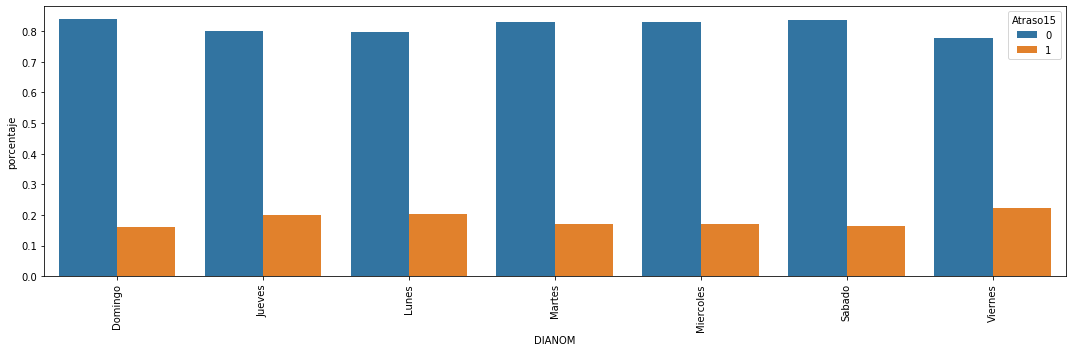

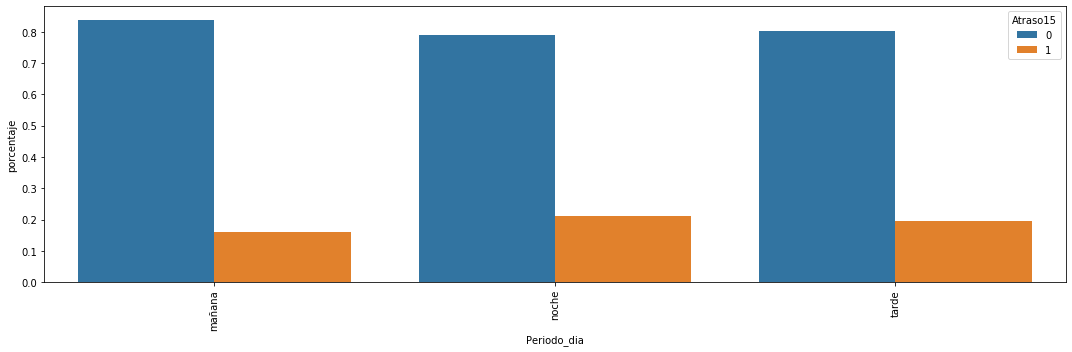

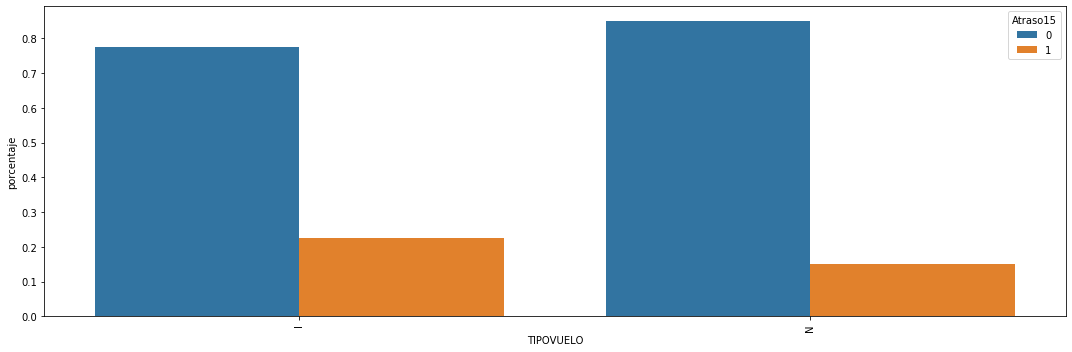

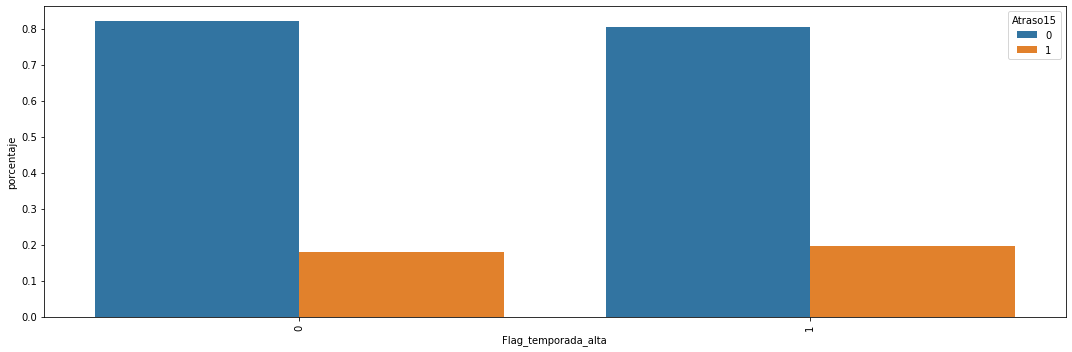

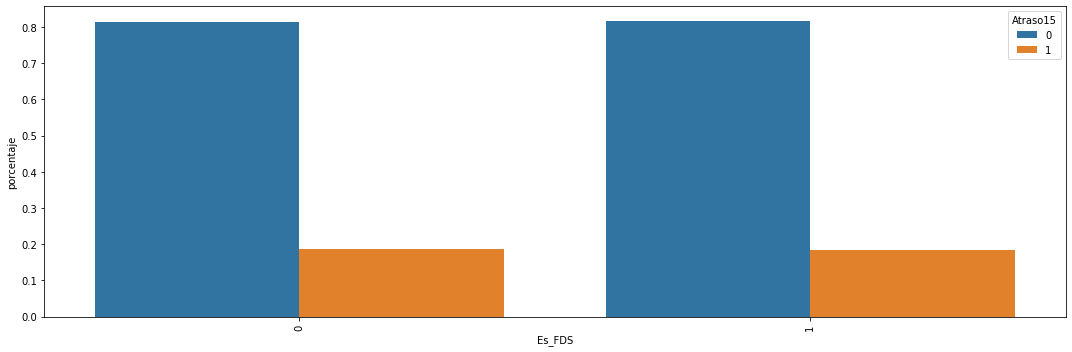

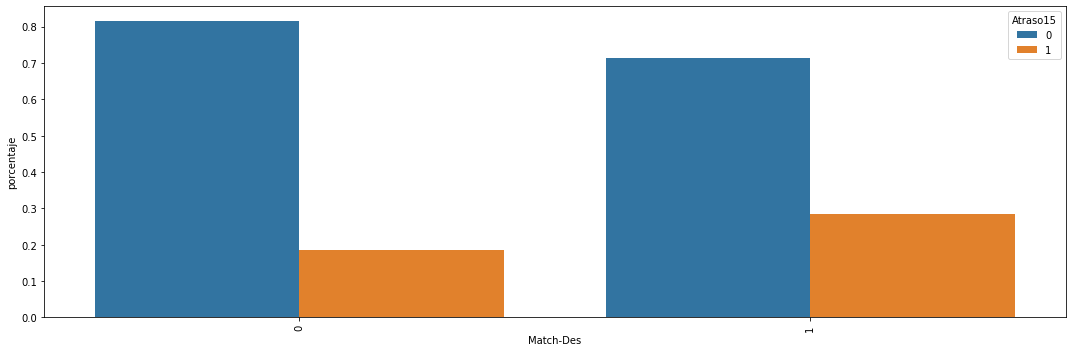

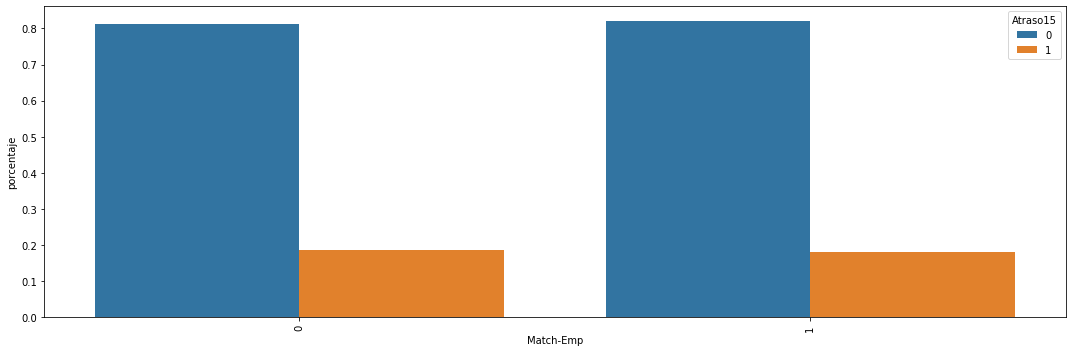

In [35]:
columnas = ['Des-I','Emp-I','MES','DIANOM','Periodo_dia','TIPOVUELO','Flag_temporada_alta','Es_FDS','Match-Des','Match-Emp']

for columna in columnas:
    data_total          = dataset[[columna,'Ori-I']].groupby([columna]).count().reset_index()
    data_desgr          = dataset[[columna,'Atraso15','Ori-I']].groupby([columna,'Atraso15']).count().reset_index()


    data = data_desgr.merge(data_total,
                            on  = columna,
                            how = 'left',
                            suffixes =  ['', '_total'])
    data['porcentaje'] = data['Ori-I']/data['Ori-I_total']
    data[columna]      = data[columna].astype('category')


    plt.figure(figsize=(15,5))
    ax = sns.barplot(y = 'porcentaje', x = columna,hue = 'Atraso15', data = data)
    plt.xticks(rotation=90)
    plt.tight_layout()

Dada las distribuciones de los gráficos, esperamos que las variables: 

   1.- **Des-I**: Hay destinos con en el que todos los vuelos se atrasan (EGYP) y otros en los que ninguno esta atrasado (SBFI). 
   
   2.- **Emp-I**: Al igual que los destinos, hay aerolineas con altas tasas de atrasos (TPU,PUE) y otras con tasas bajas (DAL, CMP).
   
   3.- **MES**: Julio es un mes con una mayor tasa de vuelos retrasados, mientras que otros como Marzo y Abril, presentan tasas bajas (en comparativa con el resto).
   
   4.- **DIA**: Se observa que los dias Jueves, Viernes y Lunes presentan tasas altas de atrasos
   
   4.- **Periodo_dia**: Se observa que en la mañana se presentan las tasas de atrasos bajas, mientras que en la tarde la tasa más alta.
   
   5.- **Tipo_Vuelo**: Se observa que la tasa de atrasos es más alta en vuelos internacionales que nacionales.
   
   6.- **Match-Des**: Los vuelos donde hay cambios de destino tiene tasa más alta de atrasos que los que no. 

Dado los argumentos anteriores, esperamos que esas variables sean las más influentes en el modelo

# 4.- Ajuste del Modelo

En primero lugar, ajustaremos un modelo a los datos sin balancear, posteriormente balancearemos las clases usando SMOTE y veremos la influencia que produce en los resultados el aplicar esta técnica a los datos.

In [36]:
import lightgbm as lgb
#import numpy as np
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split

import optuna

In [37]:
X = dataset[['Des-I','Emp-I','TIPOVUELO','Match-Des','Match-Emp','MES','DIANOM','Flag_temporada_alta','Periodo_dia','Es_FDS']]
y = dataset[['Atraso15']]
for c in X.columns:
    col_type = X[c].dtype
    if col_type == 'object':
        X[c] = X[c].astype('category')
X['MES'] = X['MES'].astype('category')

X.info()

C:\Users\franc\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\franc\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<class 'pandas.core.frame.DataFrame'>
Int64Index: 68206 entries, 0 to 70032
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Des-I                68206 non-null  category
 1   Emp-I                68206 non-null  category
 2   TIPOVUELO            68206 non-null  category
 3   Match-Des            68206 non-null  int64   
 4   Match-Emp            68206 non-null  int64   
 5   MES                  68206 non-null  category
 6   DIANOM               68206 non-null  category
 7   Flag_temporada_alta  68206 non-null  int64   
 8   Periodo_dia          68206 non-null  category
 9   Es_FDS               68206 non-null  int64   
dtypes: category(6), int64(4)
memory usage: 3.0 MB


In [38]:
y

,Atraso15
0,0
1,0
2,0
3,0
4,0
...,...
70028,1
70029,1
70030,1
70031,0


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0, stratify = y)

In [40]:
def objective(trial):
    #data, target = sklearn.datasets.load_breast_cancer(return_X_y=True)
    train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.25, stratify = y)
    dtrain = lgb.Dataset(train_x, label=train_y)
    dvalid = lgb.Dataset(valid_x, label=valid_y)

    param = {
        "objective": "binary",
        "metric": "auc",
        "verbosity": -1,
        #"is_unbalance": True,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight",0.1,10.0),
    }

    # Add a callback for pruning.
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial,"auc")
    gbm = lgb.train(
        param, dtrain, valid_sets=[dvalid], verbose_eval=False, callbacks=[pruning_callback]
    )

    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(valid_y, pred_labels)
    return accuracy

In [41]:
tuneo = True

if tuneo:
    study = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=10), direction="maximize"
    )
    study.optimize(objective, n_trials=100)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
[I 2020-09-06 22:49:28,437] Trial 0 finished with value: 0.7027914614121511 and parameters: {'lambda_l1': 0.0005766415010871882, 'lambda_l2': 6.784804127736125e-08, 'num_leaves': 187, 'feature_fraction': 0.9377109163673504, 'bagging_fraction': 0.4568179014319829, 'bagging_freq': 2, 'min_child_samples': 79, 'scale_pos_weight': 3.838313419110393}. Best is trial 0 with value: 0.7027914614121511.
C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\

[I 2020-09-06 22:49:54,151] Trial 12 finished with value: 0.8060051606849636 and parameters: {'lambda_l1': 4.4364986825141774e-08, 'lambda_l2': 0.04703277617022609, 'num_leaves': 206, 'feature_fraction': 0.8555827392066546, 'bagging_fraction': 0.8563994312070949, 'bagging_freq': 3, 'min_child_samples': 28, 'scale_pos_weight': 1.612940561842359}. Best is trial 2 with value: 0.819962467745719.
C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
[I 2020-09-06 22:49:55,378] Trial 13 pruned. Trial was pruned at iteration 13.
C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.


C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
[I 2020-09-06 22:50:19,239] Trial 27 pruned. Trial was pruned at iteration 10.
C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
[I 2020-09-06 22:50:20,363] Trial 28 pruned. Trial was pruned at iteration 10.
C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\franc\anaconda3\lib\site-packages\lightgb

C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
[I 2020-09-06 22:50:39,043] Trial 44 pruned. Trial was pruned at iteration 10.
C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
[I 2020-09-06 22:50:40,001] Trial 45 pruned. Trial was pruned at iteration 10.
C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\franc\anaconda3\lib\site-packages\lightgb

C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
[I 2020-09-06 22:50:59,071] Trial 61 pruned. Trial was pruned at iteration 17.
C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
[I 2020-09-06 22:50:59,955] Trial 62 pruned. Trial was pruned at iteration 10.
C:\Users\franc\anaconda3\lib\site-packages\lightgb

[I 2020-09-06 22:51:24,550] Trial 75 pruned. Trial was pruned at iteration 10.
C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
[I 2020-09-06 22:51:25,502] Trial 76 pruned. Trial was pruned at iteration 10.
C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
[I 2020-09-06 22:51:26,647] Trial 77 pruned. Trial

[I 2020-09-06 22:51:48,625] Trial 91 pruned. Trial was pruned at iteration 10.
C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
[I 2020-09-06 22:51:49,860] Trial 92 pruned. Trial was pruned at iteration 10.
C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1286: UserWarning: Overriding the parameters from Reference Dataset.
  warnings.warn('Overriding the parameters from Reference Dataset.')
C:\Users\franc\anaconda3\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))
[I 2020-09-06 22:51:51,018] Trial 93 pruned. Trial

Number of finished trials: 100
Best trial:
  Value: 0.8223082336382829
  Params: 
    lambda_l1: 0.007768597359425839
    lambda_l2: 6.477864724296791
    num_leaves: 197
    feature_fraction: 0.828943881702894
    bagging_fraction: 0.6613682348688841
    bagging_freq: 2
    min_child_samples: 14
    scale_pos_weight: 0.7477251495115637


In [42]:
unbalanced_model = lgb.LGBMClassifier().set_params(**trial.params)

unbalanced_model.fit(X_train, y_train,
                     eval_set = [(X_test, y_test)],
                     eval_metric = 'binary_logloss',
                     early_stopping_rounds = 10000)

C:\Users\franc\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[1]	valid_0's binary_logloss: 0.474384
Training until validation scores don't improve for 10000 rounds
[2]	valid_0's binary_logloss: 0.471138
[3]	valid_0's binary_logloss: 0.466779
[4]	valid_0's binary_logloss: 0.463065
[5]	valid_0's binary_logloss: 0.461071
[6]	valid_0's binary_logloss: 0.458032
[7]	valid_0's binary_logloss: 0.455589
[8]	valid_0's binary_logloss: 0.454033
[9]	valid_0's binary_logloss: 0.452491
[10]	valid_0's binary_logloss: 0.451163
[11]	valid_0's binary_logloss: 0.449948
[12]	valid_0's binary_logloss: 0.448454
[13]	valid_0's binary_logloss: 0.447341
[14]	valid_0's binary_logloss: 0.446422
[15]	valid_0's binary_logloss: 0.445768
[16]	valid_0's binary_logloss: 0.44476
[17]	valid_0's binary_logloss: 0.444369
[18]	valid_0's binary_logloss: 0.443985
[19]	valid_0's binary_logloss: 0.443445
[20]	valid_0's binary_logloss: 0.443026
[21]	valid_0's binary_logloss: 0.442587
[22]	valid_0's binary_logloss: 0.442288
[23]	valid_0's binary_logloss: 0.442283
[24]	valid_0's binary_logl

LGBMClassifier(bagging_fraction=0.6613682348688841, bagging_freq=2,
               feature_fraction=0.828943881702894,
               lambda_l1=0.007768597359425839, lambda_l2=6.477864724296791,
               min_child_samples=14, num_leaves=197,
               scale_pos_weight=0.7477251495115637)

# 5.- Evaluando el Modelo

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = unbalanced_model.predict(X_test)

# view accuracy
accuracy_opt = accuracy_score(y_pred, y_test)
print('LightGBM Model with optuna accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

y_pred_train = unbalanced_model.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

LightGBM Model with optuna accuracy score: 0.8214
Training-set accuracy score: 0.8270
Confusion matrix

 [[13758   140]
 [ 2905   249]]

True Positives(TP) =  13758

True Negatives(TN) =  249

False Positives(FP) =  140

False Negatives(FN) =  2905


In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90     13898
           1       0.64      0.08      0.14      3154

    accuracy                           0.82     17052
   macro avg       0.73      0.53      0.52     17052
weighted avg       0.79      0.82      0.76     17052



El modelo presenta logra captar bien cuando un bueno NO se atrasada, pero falla ampliamente al captar el comportamiento de los vuelos que se retrasan. Por lo que inferimos que el modelo esta sobreajustado a la clase negativa, lo cual es natural al considerar el desbalanceo de los datos.

###############################################################################################################################

Para revisar que variables son las más influentes para el modelo usamos la libreria Shap, la cual individualiza el efecto de cada una de las variables. Es decir, mira la importancia para cada una de las observaciones/vuelos y evita ambigüedades.

(referencia: https://github.com/slundberg/shap)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


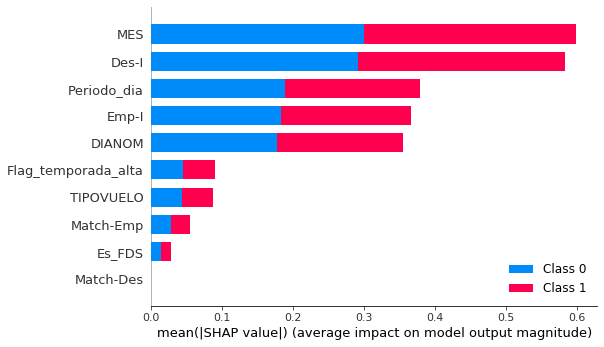

In [45]:
import shap

explainer = shap.TreeExplainer(unbalanced_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

Observamos que las variables más influentes para el model, son el Mes, el destino, el operador, el dia de la semana, el periodo del dia y el tipo de vuelo. Si el vuelo se realiza en temporada alta, si es fin de semana y si hay cambios en operador, presentan relevancia, pero más recatadas que las anteriormente mencionadas.

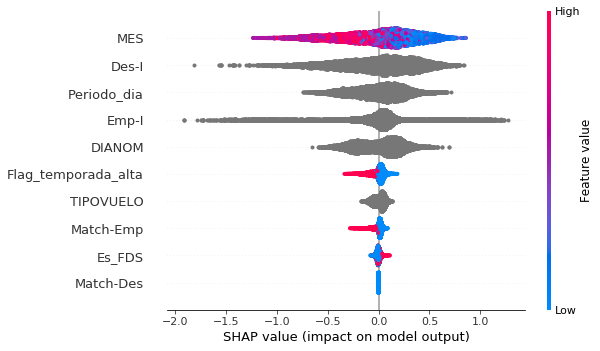

In [46]:
shap.summary_plot(shap_values[0], X_test)

Además *Shap* nos permite ver la distribucion de importancia para las observaciones. Observamos que la variable Mes es importante/poco importante para varias observaciones de una forma relativamente homogenea, mientras que las variables Destino, Aerolinea, Dia de la semana, Periodo del dia y Tipo vuelo, tienen una relevancia media/alta para la mayoria de las observaciones.

Un detalle importante, es que, a pesar de que en general, los cambios de destino no son una variable relevante para el modelo, SI hay observaciones/casos en los que es una variable relevante para que el vuelo se atrase.

# 6 Corrigiendo el problema de las clases

Nos encontramos en un escenario de clases no balanceadas, en donde el 82% de los vuelos salen a tiempo y el 18% de los vuelos se atrasa. Veremos como el aplicar la técnica de SMOTE afecta al desempeño del modelo.

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51154 entries, 57880 to 11402
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Des-I                51154 non-null  category
 1   Emp-I                51154 non-null  category
 2   TIPOVUELO            51154 non-null  category
 3   Match-Des            51154 non-null  int64   
 4   Match-Emp            51154 non-null  int64   
 5   MES                  51154 non-null  category
 6   DIANOM               51154 non-null  category
 7   Flag_temporada_alta  51154 non-null  int64   
 8   Periodo_dia          51154 non-null  category
 9   Es_FDS               51154 non-null  int64   
dtypes: category(6), int64(4)
memory usage: 2.2 MB


In [48]:
from imblearn.over_sampling import SMOTENC

sm = SMOTENC(random_state = 42, categorical_features = [0,1,2,5,6,8])

X_resampled, y_resampled = sm.fit_sample(X_train, y_train)

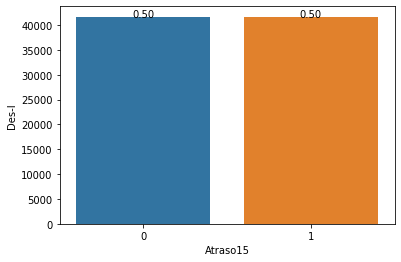

In [49]:
df_resampled = pd.concat([X_resampled,y_resampled], axis = 1)
total = float(len(df_resampled))


ax =sns.barplot(x = 'Atraso15', y = 'Des-I', data = df_resampled[['Atraso15','Des-I']].groupby(['Atraso15']).count().reset_index())

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

In [50]:
unbalanced_model_2 = lgb.LGBMClassifier().set_params(**trial.params)

unbalanced_model_2.fit(X_resampled, y_resampled,
                       eval_set = [(X_test, y_test)],
                       eval_metric = 'binary_logloss',
                       early_stopping_rounds = 10000)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[LightGBM] [Warning] feature_fraction is set=0.828943881702894, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.828943881702894
[LightGBM] [Warning] lambda_l1 is set=0.007768597359425839, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007768597359425839
[LightGBM] [Warning] bagging_fraction is set=0.6613682348688841, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6613682348688841
[LightGBM] [Warning] lambda_l2 is set=6.477864724296791, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.477864724296791
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.


[1]	valid_0's binary_logloss: 0.675278
Training until validation scores don't improve for 10000 rounds
[2]	valid_0's binary_logloss: 0.66099
[3]	valid_0's binary_logloss: 0.64651
[4]	valid_0's binary_logloss: 0.633743
[5]	valid_0's binary_logloss: 0.62439
[6]	valid_0's binary_logloss: 0.614325
[7]	valid_0's binary_logloss: 0.60514
[8]	valid_0's binary_logloss: 0.597977
[9]	valid_0's binary_logloss: 0.591966
[10]	valid_0's binary_logloss: 0.586519
[11]	valid_0's binary_logloss: 0.581606
[12]	valid_0's binary_logloss: 0.576337
[13]	valid_0's binary_logloss: 0.571979
[14]	valid_0's binary_logloss: 0.568258
[15]	valid_0's binary_logloss: 0.565038
[16]	valid_0's binary_logloss: 0.561808
[17]	valid_0's binary_logloss: 0.559388
[18]	valid_0's binary_logloss: 0.557165
[19]	valid_0's binary_logloss: 0.555154
[20]	valid_0's binary_logloss: 0.553005
[21]	valid_0's binary_logloss: 0.551133
[22]	valid_0's binary_logloss: 0.54972
[23]	valid_0's binary_logloss: 0.548231
[24]	valid_0's binary_logloss:

LGBMClassifier(bagging_fraction=0.6613682348688841, bagging_freq=2,
               feature_fraction=0.828943881702894,
               lambda_l1=0.007768597359425839, lambda_l2=6.477864724296791,
               min_child_samples=14, num_leaves=197,
               scale_pos_weight=0.7477251495115637)

In [51]:
y_pred_resampled = unbalanced_model_2.predict(X_test)

# view accuracy
accuracy_opt = accuracy_score(y_pred_resampled, y_test)
print('LightGBM Model with optuna accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_resampled)))

y_pred_train = unbalanced_model_2.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

cm = confusion_matrix(y_test, y_pred_resampled)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

LightGBM Model with optuna accuracy score: 0.7423
Training-set accuracy score: 0.7837
Confusion matrix

 [[11229  2669]
 [ 1726  1428]]

True Positives(TP) =  11229

True Negatives(TN) =  1428

False Positives(FP) =  2669

False Negatives(FN) =  1726


In [52]:
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84     13898
           1       0.35      0.45      0.39      3154

    accuracy                           0.74     17052
   macro avg       0.61      0.63      0.62     17052
weighted avg       0.77      0.74      0.75     17052



Observamos que, a pesar de que utilizamos los parametros tuneados a los datos desbalanceados, hemos mejorado la captura de los vuelos atrasados, mejorando levementel la precision y el recall,  además esto se visualiza de mejor manera al comparar los f1-score de ambos modelos. 

Ahora generaremos un modelo considerando los datos balanceados:

In [53]:
def objective_resampled(trial):
    #data, target = sklearn.datasets.load_breast_cancer(return_X_y=True)
    train_x, valid_x, train_y, valid_y = train_test_split(X_resampled, y_resampled, test_size=0.25, stratify = y_resampled)
    dtrain = lgb.Dataset(train_x, label=train_y)
    dvalid = lgb.Dataset(valid_x, label=valid_y)

    param = {
        "objective": "binary",
        "metric": "auc",
        "verbosity": -1,
        #"is_unbalance": True,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight",0.1,10.0),
    }

    # Add a callback for pruning.
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial,"auc")
    gbm = lgb.train(
        param, dtrain, valid_sets=[dvalid], verbose_eval=False, callbacks=[pruning_callback]
    )

    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(valid_y, pred_labels)
    return accuracy

In [54]:
tuneo = True

if tuneo:
    study_2 = optuna.create_study(
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=10), direction="maximize"
    )
    study_2.optimize(objective_resampled, n_trials=100)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial_2 = study_2.best_trial

    print("  Value: {}".format(trial_2.value))

    print("  Params: ")
    for key, value in trial_2.params.items():
        print("    {}: {}".format(key, value))

Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
[I 2020-09-06 22:53:01,106] Trial 0 finished with value: 0.6002302489566844 and parameters: {'lambda_l1': 0.04649927892477143, 'lambda_l2': 0.0001020523643171759, 'num_leaves': 207, 'feature_fraction': 0.5497449425625545, 'bagging_fraction': 0.4613385635269144, 'bagging_freq': 2, 'min_child_samples': 41, 'scale_pos_weight': 4.051093940783152}. Best is trial 0 with value: 0.6002302489566844.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
[I 2020-09-06 22:53:04,587] Trial 1 finished with value: 0.6215762459826354 and parameters: {'lambda_l1': 0.27791268754651827, 'lambda_l2': 1.248701207130609e-07, 'num_leaves': 81, 'feature_fraction': 0.8485119815622242, 'bagging_fraction': 0.9298703392535991, 'bagging_freq': 3, 'min_child_samples': 9, 'scale_pos_weight': 4.126194497406138}. Best is trial 1 with value: 0.6215762459826354.
Overriding the par

[I 2020-09-06 22:54:15,412] Trial 24 pruned. Trial was pruned at iteration 10.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
[I 2020-09-06 22:54:16,790] Trial 25 pruned. Trial was pruned at iteration 10.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
[I 2020-09-06 22:54:18,192] Trial 26 pruned. Trial was pruned at iteration 10.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
[I 2020-09-06 22:54:19,534] Trial 27 pruned. Trial was pruned at iteration 10.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
[I 2020-09-06 22:54:20,940] Trial 28 pruned. Trial was pruned at iteration 10.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
[I 2020-09-06 22:54:22,280] Trial 29 pruned. Trial was pruned at iteration 10.
Overriding the parameters from Refer

categorical_column in param dict is overridden.
[I 2020-09-06 22:55:30,601] Trial 58 pruned. Trial was pruned at iteration 31.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
[I 2020-09-06 22:55:32,195] Trial 59 pruned. Trial was pruned at iteration 10.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
[I 2020-09-06 22:55:33,774] Trial 60 pruned. Trial was pruned at iteration 10.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
[I 2020-09-06 22:55:35,260] Trial 61 pruned. Trial was pruned at iteration 10.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
[I 2020-09-06 22:55:36,727] Trial 62 pruned. Trial was pruned at iteration 10.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
[I 2020-09-06 22:55:38,146] Trial 63 pruned. Trial was pruned at it

[I 2020-09-06 22:56:48,796] Trial 87 finished with value: 0.7534417422171056 and parameters: {'lambda_l1': 9.303366577266372e-07, 'lambda_l2': 1.776356351090056e-08, 'num_leaves': 224, 'feature_fraction': 0.920464382858129, 'bagging_fraction': 0.8148312341814394, 'bagging_freq': 7, 'min_child_samples': 96, 'scale_pos_weight': 1.2802966400252198}. Best is trial 81 with value: 0.7558881373818774.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
[I 2020-09-06 22:56:50,174] Trial 88 pruned. Trial was pruned at iteration 10.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
[I 2020-09-06 22:56:51,584] Trial 89 pruned. Trial was pruned at iteration 10.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
[I 2020-09-06 22:56:52,937] Trial 90 pruned. Trial was pruned at iteration 10.
Overriding the parameters from Reference Dataset.
categorical_column in

Number of finished trials: 100
Best trial:
  Value: 0.7587662493404327
  Params: 
    lambda_l1: 3.173903045993599e-05
    lambda_l2: 3.007167439334604e-08
    num_leaves: 241
    feature_fraction: 0.9786151392404656
    bagging_fraction: 0.7643474962489284
    bagging_freq: 7
    min_child_samples: 87
    scale_pos_weight: 1.2927161335061241


In [55]:
balanced_model = lgb.LGBMClassifier().set_params(**trial_2.params)

balanced_model.fit(X_resampled, y_resampled,
                   eval_set = [(X_test, y_test)],
                   eval_metric = 'binary_logloss',
                   early_stopping_rounds = 10000)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[LightGBM] [Warning] feature_fraction is set=0.9786151392404656, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9786151392404656
[LightGBM] [Warning] lambda_l1 is set=3.173903045993599e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.173903045993599e-05
[LightGBM] [Warning] bagging_fraction is set=0.7643474962489284, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7643474962489284
[LightGBM] [Warning] lambda_l2 is set=3.007167439334604e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.007167439334604e-08
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[1]	valid_0's binary_logloss: 0.685321
Training until validation scores don't improve for 10000 rounds
[2]	valid_0's binary_logloss: 0.678608
[3]	valid_0's binary_logloss: 0.673699
[4]	valid_0's binary_logloss: 0.670128
[5]	valid_0's binary_logloss: 0.667516
[6]	valid_0's binary_logloss: 0.665461
[7]	valid_0's 

LGBMClassifier(bagging_fraction=0.7643474962489284, bagging_freq=7,
               feature_fraction=0.9786151392404656,
               lambda_l1=3.173903045993599e-05, lambda_l2=3.007167439334604e-08,
               min_child_samples=87, num_leaves=241,
               scale_pos_weight=1.2927161335061241)

In [56]:
y_pred_resampled_2 = balanced_model.predict(X_test)

# view accuracy
accuracy_opt = accuracy_score(y_pred_resampled_2, y_test)
print('LightGBM Model with optuna accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_resampled_2)))

y_pred_train = balanced_model.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

cm = confusion_matrix(y_test, y_pred_resampled_2)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

LightGBM Model with optuna accuracy score: 0.6561
Training-set accuracy score: 0.7235
Confusion matrix

 [[9349 4549]
 [1315 1839]]

True Positives(TP) =  9349

True Negatives(TN) =  1839

False Positives(FP) =  4549

False Negatives(FN) =  1315


In [57]:
print(classification_report(y_test, y_pred_resampled_2))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76     13898
           1       0.29      0.58      0.39      3154

    accuracy                           0.66     17052
   macro avg       0.58      0.63      0.57     17052
weighted avg       0.77      0.66      0.69     17052



Observamos que esta segunda opcion tiene una menor tasa de Falso Positivos, obteniedo resultados un poco mas homogeneos entre ambas clases. Al analizar la importancia de las variables para este nuevo modelo obtenemos:

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


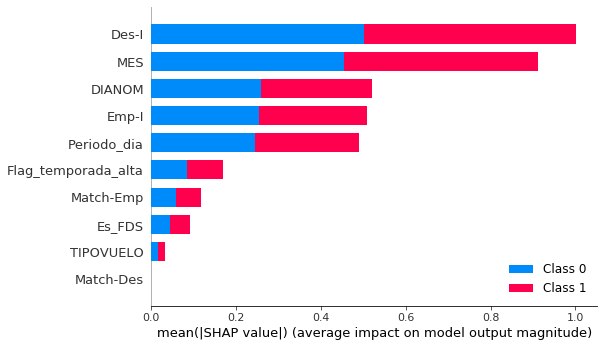

In [58]:
explainer_2 = shap.TreeExplainer(balanced_model)
shap_values_2 = explainer_2.shap_values(X_test)
shap.summary_plot(shap_values_2, X_test, plot_type="bar")

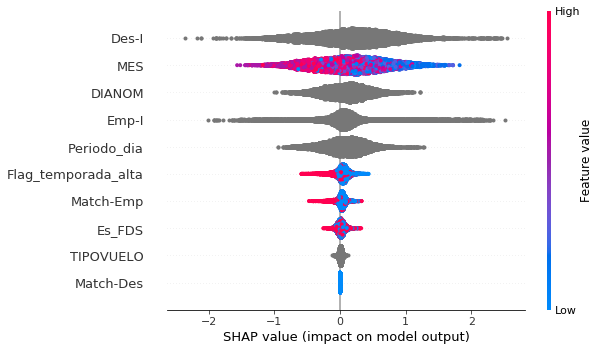

In [59]:
shap.summary_plot(shap_values_2[0], X_test)

Nos damos cuenta que la mayor diferencia del modelo, es el cambio en el orden de la importancia de las variables, en donde ahora la más importante es el destino. Sin embargo, el top 5 de las variables sigue siendo el mismo.

# 6 Conclusiones y oportunidades de mejora

En primer lugar comentaremos un poco sobre el trabajo realizado. Hemos decidido ajustar solo un modelo, el cual corresponde a lightgbm. Se eligio este modelo por que a presentando buena performance en distintas competencias. El por que no usar algun otro modelo de boosting como xgboost es netamente un tema de que se posee mayor manejo especifico de la libreria, pues, como el data el dataset en particula que se trabajó es pequeño, no deberian haber mayores complicaciones para usar un modelo u otro.

Además utilizamos la herramienta optuna para realizar el tuneo de los hiperparametros, para obtener la mejor combinación posible de los parametros clave, tanto como para los datos balanceados como desbalanceados.

La falta de los datos climaticos en el modelo es algo que creemos puede mejorar sustancialmente los resultados, lamentablemente las API's revisadas contaban con diferentes limitantes que no permitieron extraer los datos que necesitabamos.

Algunas oportunidades de mejora:

       1.- Trabajar en la extraccion de los datos climaticos.

       2.- Probar con diferentes modelos.
       
       3.- Cambiar el enfoque a uno de deteccion de anomalias.